In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
% matplotlib inline
star_wars = pd.read_csv('star_wars.csv', encoding='ISO-8859-1')

In [2]:
for pos, name in enumerate(star_wars.iloc[0,15:29]):
    star_wars = star_wars.rename(columns={
        star_wars.columns[pos+15]: name
    })

In [3]:
star_wars.columns

Index(['RespondentID',
       'Have you seen any of the 6 films in the Star Wars franchise?',
       'Do you consider yourself to be a fan of the Star Wars film franchise?',
       'Which of the following Star Wars films have you seen? Please select all that apply.',
       'Unnamed: 4', 'Unnamed: 5', 'Unnamed: 6', 'Unnamed: 7', 'Unnamed: 8',
       'Please rank the Star Wars films in order of preference with 1 being your favorite film in the franchise and 6 being your least favorite film.',
       'Unnamed: 10', 'Unnamed: 11', 'Unnamed: 12', 'Unnamed: 13',
       'Unnamed: 14', 'Han Solo', 'Luke Skywalker', 'Princess Leia Organa',
       'Anakin Skywalker', 'Obi Wan Kenobi', 'Emperor Palpatine',
       'Darth Vader', 'Lando Calrissian', 'Boba Fett', 'C-3P0', 'R2 D2',
       'Jar Jar Binks', 'Padme Amidala', 'Yoda', 'Which character shot first?',
       'Are you familiar with the Expanded Universe?',
       'Do you consider yourself to be a fan of the Expanded Universe?ÂÃ¦',
       'D

In [4]:
star_wars = star_wars[pd.notnull(star_wars['RespondentID'])]

In [5]:
star_wars.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1186 entries, 1 to 1186
Data columns (total 38 columns):
RespondentID                                                                                                                                     1186 non-null float64
Have you seen any of the 6 films in the Star Wars franchise?                                                                                     1186 non-null object
Do you consider yourself to be a fan of the Star Wars film franchise?                                                                            836 non-null object
Which of the following Star Wars films have you seen? Please select all that apply.                                                              673 non-null object
Unnamed: 4                                                                                                                                       571 non-null object
Unnamed: 5                                                       

In [6]:
star_wars['Have you seen any of the 6 films in the Star Wars franchise?'] = star_wars['Have you seen any of the 6 films in the Star Wars franchise?'].map(lambda x:1 if x == 'Yes' else 0)
star_wars['Have you seen any of the 6 films in the Star Wars franchise?'].value_counts(dropna=False)

1    936
0    250
Name: Have you seen any of the 6 films in the Star Wars franchise?, dtype: int64

In [7]:
yes_no_d = {
    'Yes': 1,
    'No': 0
}
star_wars['Do you consider yourself to be a fan of the Star Wars film franchise?'] = star_wars['Do you consider yourself to be a fan of the Star Wars film franchise?'].map(yes_no_d)
star_wars['Do you consider yourself to be a fan of the Star Wars film franchise?'].value_counts(dropna=False)

 1.0    552
NaN     350
 0.0    284
Name: Do you consider yourself to be a fan of the Star Wars film franchise?, dtype: int64

In [8]:
seen_films_data = star_wars[star_wars.columns[3:9]]

star_wars_episodes = ['Star Wars: Episode I  The Phantom Menace',
                      'Star Wars: Episode II  Attack of the Clones',
                      'Star Wars: Episode III  Revenge of the Sith',
                      'Star Wars: Episode IV  A New Hope',
                      'Star Wars: Episode V The Empire Strikes Back',
                      'Star Wars: Episode VI Return of the Jedi']

for i in range(6):
    star_wars.loc[:,seen_films_data.columns[i]] = seen_films_data.iloc[:,i].map(
        lambda x:1 if x == star_wars_episodes[i] else 0)
    star_wars = star_wars.rename(columns={
        seen_films_data.columns[i]: 'Have you seen '+str(i+1)+' episode?'
    })


In [9]:
star_wars[star_wars.columns[9:15]] = star_wars[star_wars.columns[9:15]].astype(float)

rank_films = star_wars[star_wars.columns[9:15]]
for i in range(len(star_wars[star_wars.columns[9:15]].columns)):
    star_wars = star_wars.rename(columns={
        rank_films.columns[i]: 'Episode_'+str(i+1)
    })

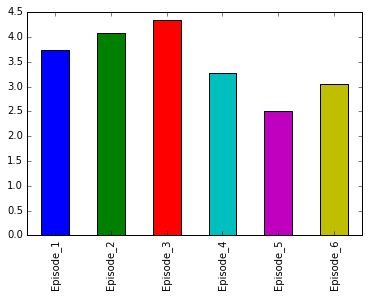

In [10]:
star_wars[star_wars.columns[9:15]].mean().plot.bar()

From bar chart we see that more favorite part of Star Wars movies is 5. And in opposite the less favorite part is 3. Also there is interesting observation that early movies are more liked fans. As for newest 3 parts there is a pattern: than newer movie then less fans likes it.

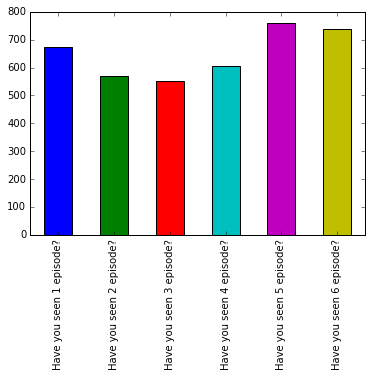

In [11]:
star_wars[star_wars.columns[3:9]].sum().plot.bar()

Here we see how many respondents seen each episode and the result show us correlation with ranking data.
Most seen episode is 5(same that popular) and overwise less seen episode is 3. Interest in this data is that first episode have more views then fourth.  Let's try to find out explanation to this misunderstanding.

In [12]:
fans = star_wars[star_wars['Do you consider yourself to be a fan of the Star Wars film franchise?'] == 1]
not_fans = star_wars[star_wars['Do you consider yourself to be a fan of the Star Wars film franchise?'] == 0]

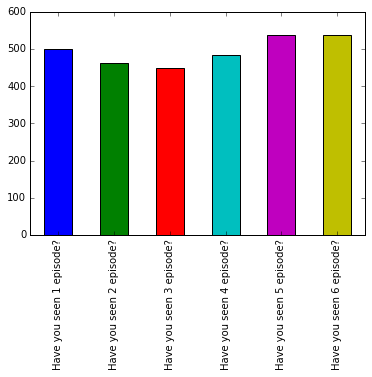

In [13]:
fans.iloc[:,3:9].sum().plot.bar()

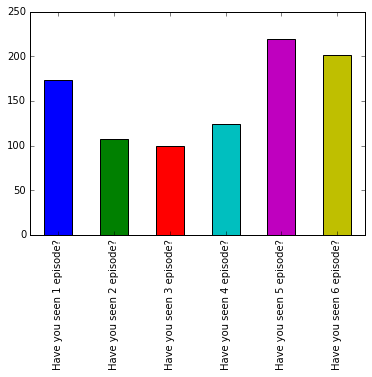

In [14]:
not_fans.iloc[:,3:9].sum().plot.bar()

Here we can response to a misunderstanding from the privious note why fourth episode has less views then first. One assumption is that 'not fans' respondents more likes first then fourth episodes and other is that 'not fans' began their acquaintance with movies not in chronological order but in numerical.

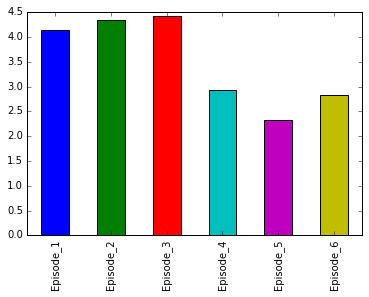

In [15]:
fans[fans.columns[9:15]].mean().plot.bar()

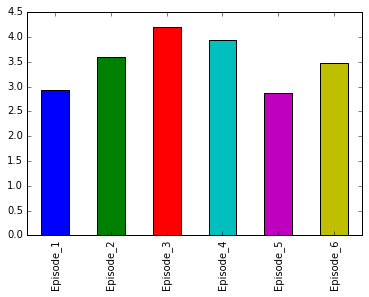

In [16]:
not_fans[not_fans.columns[9:15]].mean().plot.bar()

As see from charts 'not fans' respondents likes first episode almost like fifth episode. From this observation we can make a resume that 'not fans' respondents started to watch Star Wars movies not at chronolgical order. 

In [17]:
male = star_wars[star_wars['Gender'] == 'Male']
female = star_wars[star_wars['Gender'] == 'Female']

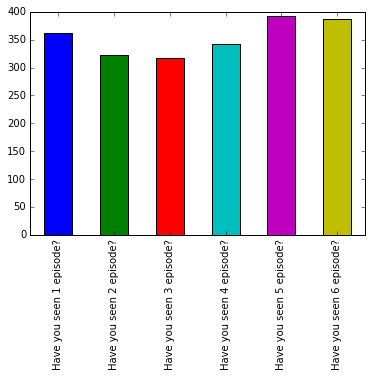

In [18]:
male.iloc[:,3:9].sum().plot.bar()

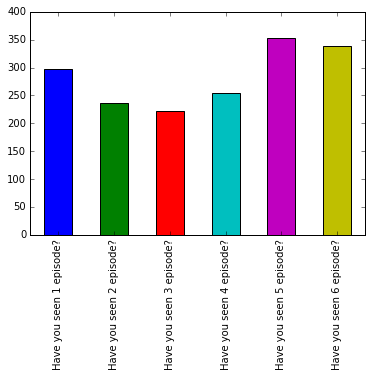

In [19]:
female.iloc[:,3:9].sum().plot.bar()

In [20]:
star_wars['Education'].value_counts()

Some college or Associate degree    328
Bachelor degree                     321
Graduate degree                     275
High school degree                  105
Less than high school degree          7
Name: Education, dtype: int64

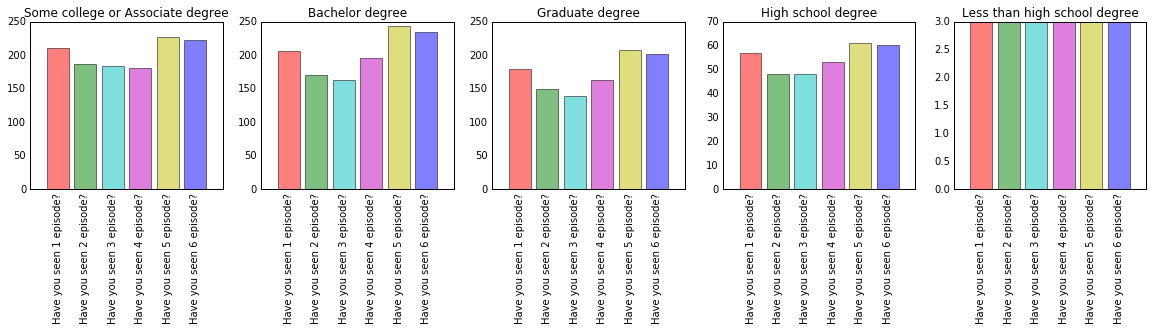

In [21]:
resp_educations = star_wars['Education'].value_counts().index
fig = plt.figure(figsize=(20, 3))

for pos, r in enumerate(resp_educations):
    ax = fig.add_subplot(1,len(resp_educations),int(pos)+1)
    edu_type = star_wars.loc[star_wars['Education'] == r, star_wars.columns[3:9]].sum()
    y_pos = np.arange(len(edu_type.values))
    ax.bar(y_pos, edu_type.values, align='center', alpha=0.5,  color={'r','g','b','m','y','b','c'})
    ax.set_xticks(y_pos)
    ax.set_xticklabels(list(edu_type.index),rotation=90)

    ax.set_title(r)
    ax.tick_params(bottom="off", top="off", left="off", right="off")
    

plt.show()

In [22]:
star_wars['Location (Census Region)'].value_counts()

East North Central    181
Pacific               175
South Atlantic        170
Middle Atlantic       122
West South Central    110
West North Central     93
Mountain               79
New England            75
East South Central     38
Name: Location (Census Region), dtype: int64

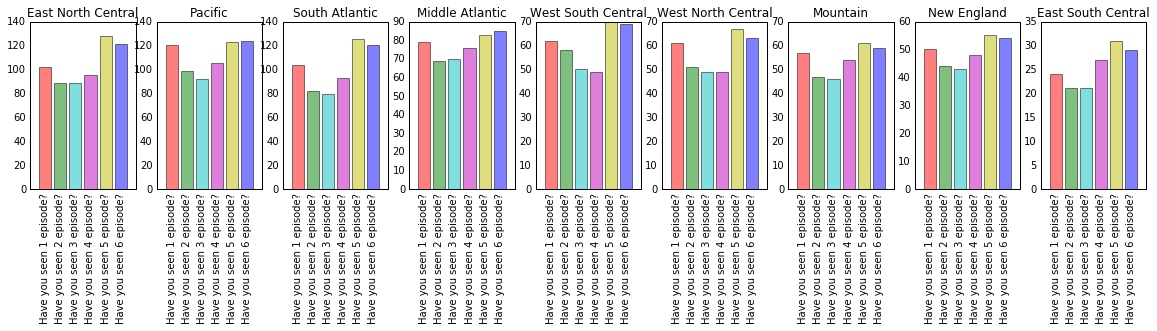

In [23]:
resp_loc = star_wars['Location (Census Region)'].value_counts().index
fig = plt.figure(figsize=(20, 3))

for pos, r in enumerate(resp_loc):
    ax = fig.add_subplot(1,len(resp_loc),int(pos)+1)
    edu_type = star_wars.loc[star_wars['Location (Census Region)'] == r, star_wars.columns[3:9]].sum()
    y_pos = np.arange(len(edu_type.values))
    ax.bar(y_pos, edu_type.values, align='center', alpha=0.5,  color={'r','g','b','m','y','b','c'})
    ax.set_xticks(y_pos)
    ax.set_xticklabels(list(edu_type.index),rotation=90)

    ax.set_title(r)
    ax.tick_params(bottom="off", top="off", left="off", right="off")
    

plt.show()

In [24]:
characters_dict = dict()
for c in star_wars.columns[15:29]:
    characters_dict[c] = star_wars[c].value_counts().values
    
columns = [key for key in characters_dict]
index = star_wars[star_wars.columns[15]].value_counts().index

In [25]:
characters = pd.DataFrame(characters_dict, columns=columns, index=index)
characters

,Yoda,Obi Wan Kenobi,Emperor Palpatine,Boba Fett,Darth Vader,Lando Calrissian,Han Solo,R2 D2,Anakin Skywalker,Padme Amidala,Luke Skywalker,C-3P0,Jar Jar Binks,Princess Leia Organa
Very favorably,605,591,213,248,310,236,610,562,269,207,552,474,204,547
Somewhat favorably,144,159,156,153,171,223,151,185,245,183,219,229,164,210
Neither favorably nor unfavorably (neutral),51,43,143,138,149,148,44,57,135,168,38,79,130,48
Unfamiliar (N/A),10,17,124,132,102,142,15,10,83,164,13,23,112,12
Somewhat unfavorably,8,8,110,96,84,63,8,10,52,58,6,15,109,8
Very unfavorably,8,7,68,45,10,8,1,6,39,34,3,7,102,6


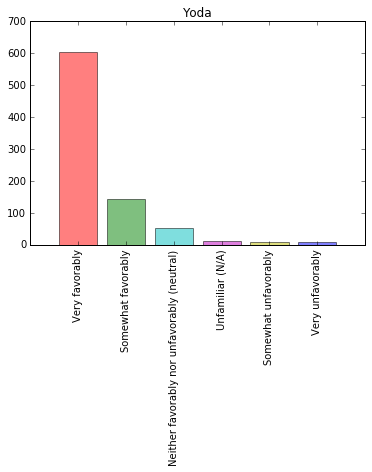

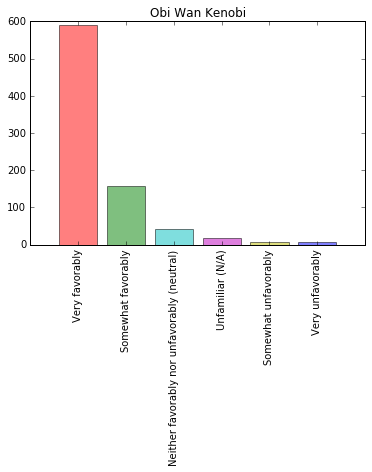

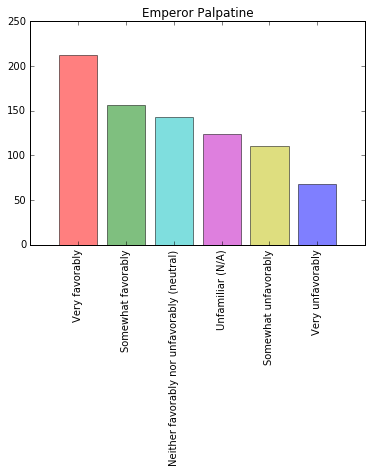

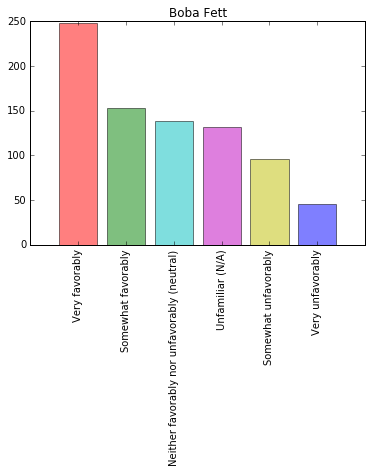

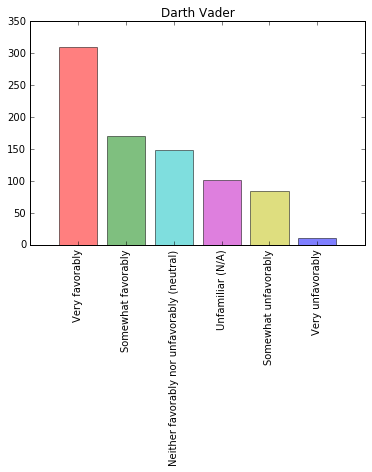

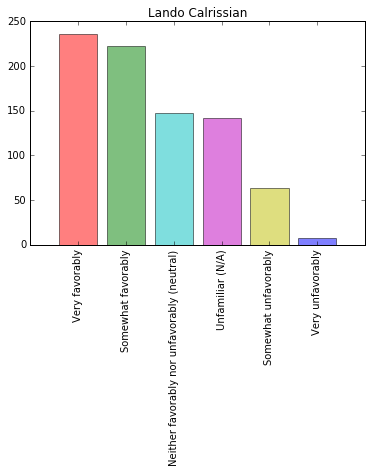

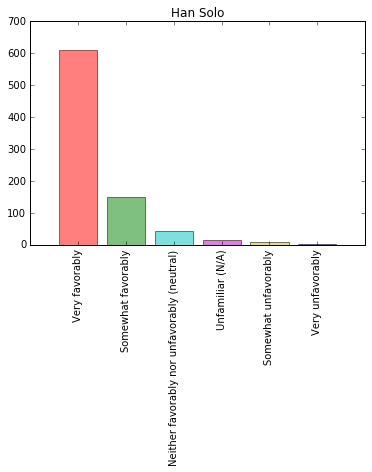

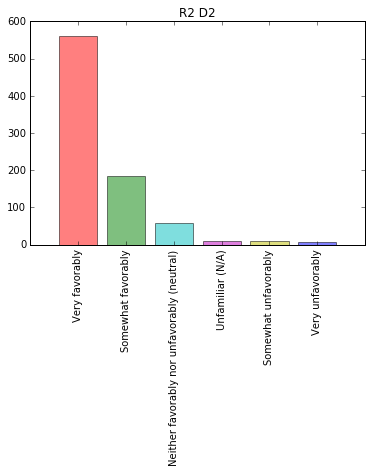

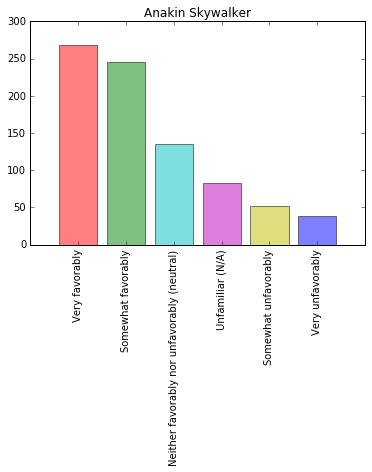

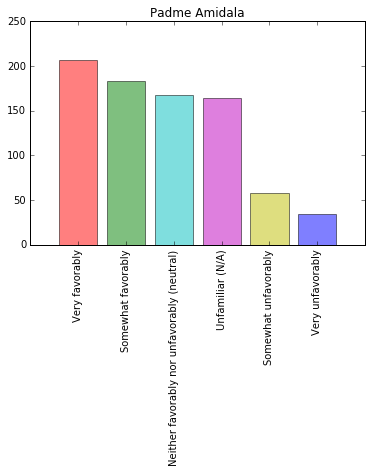

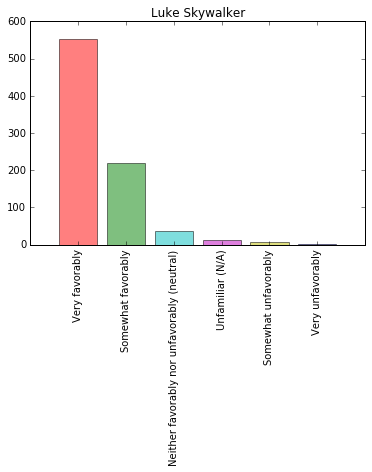

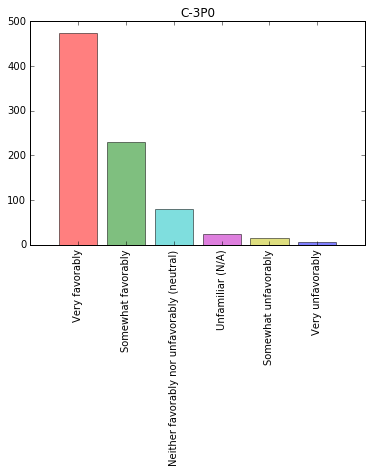

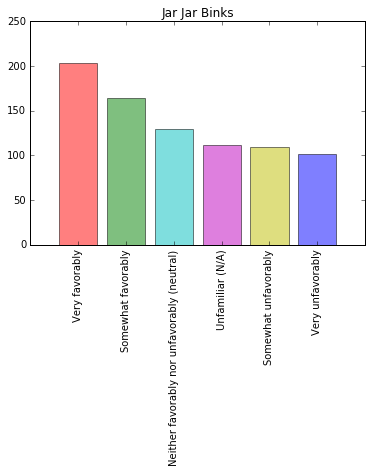

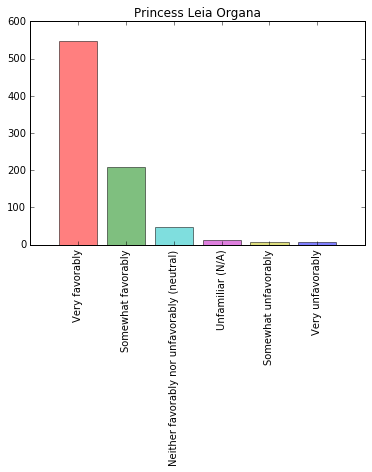

In [26]:
for c in characters.columns:
    plt.bar(np.arange(characters.shape[0]), characters[c], align='center', alpha=0.5,  color={'r','g','b','m','y','b','c'})
    plt.xticks(np.arange(characters.shape[0]), characters[c].index, rotation=90)
    plt.title(c)
    plt.show()